In [19]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
import os

In [2]:
!pwd

/home/ljd2160


# Dataloader

In [3]:
data_path = "~/research/OASIS1/LST/S0001"
annotations_file = "~/research/OASIS1/oasis_cross-sectional.csv"


In [4]:
csvFile = pd.read_csv(annotations_file)
csvFile = csvFile.dropna(subset=['CDR'])
csvFile = csvFile.reset_index(drop=True)
csvFile = csvFile[['ID', 'CDR']]
csvFile['CDR'] = [1 if i> 0 else 0 for i in csvFile['CDR']]
csvFile.iloc[0,0].replace("MR1", "S0001_T1_0_nu_acpc.nii")

'OAS1_0001_S0001_T1_0_nu_acpc.nii'

In [11]:
class OASIS(Dataset):
    def __init__(self, annotations_file, data_path, transform=None):
        # clean up the csv file so that only the ID and CDR columns are left
        self.labels = pd.read_csv(annotations_file)
        self.labels = self.labels[['ID', 'CDR']]
        self.labels = self.labels.dropna(subset=['CDR'])
        self.labels = self.labels.reset_index(drop=True)
        self.labels['CDR'] = [1 if i> 0 else 0 for i in self.labels['CDR']]

        self.data_path = data_path
        self.transform = transform


    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, idx):
        img_filename = self.labels.iloc[idx, 0].replace("MR1", "S0001_T1_O_nu_acpc.nii")
        img_path = os.path.join(data_path, img_filename)
        nifti = nib.load(img_path)
        img = nifti.get_fdata()
        label = self.labels.iloc[idx, 1]
        return img, label

        

## test dataloader

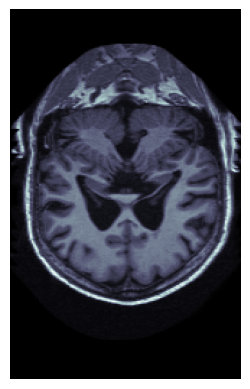

0


In [13]:
oasis = OASIS(annotations_file, data_path)
img, label = oasis[0]
plt.imshow(img[96], cmap = 'bone')
plt.axis('off')
plt.show()
print(label)

## test and train split

In [16]:
train_size = int(0.8 * len(oasis))
test_size = len(oasis) - train_size
train_dataset, test_dataset = random_split(oasis, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

tensor([1, 0, 1, 1])


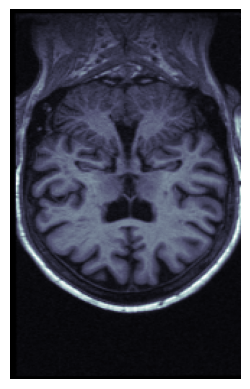

In [18]:
img, label = next(iter(train_loader))
plt.imshow(img[0][96], cmap = 'bone')
plt.axis('off')
print(label)

# NeuralNetwork

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):

# Training